Predictive Analysis for Stock Prices

<h1>Table of Contents</h1>
<ul>
    <li><a href="#plan">💡 Notebook plan & code aims</a></li>
    <li><a href="#clean">💰 EDA + Cleaning</a></li>
    <li><a href="#vis">📈 Visualization</a></li>
    <li><a href="#end">🧠 Conclusions</a></li>
</ul>
<hr>
<p></p>
<div id="top" style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1>💡 Notebook plan & code aims</h1>
</div>
<p></p>
<p>Let's look at out dataset for the last time in this section before moving to visualization. We have done a great job, but most importantely, we figured out a lot about data we will deal with in visualization section. So, <mark>lets move on further</mark>:</p>
<ol>
    <li>First of all I want to make a <mark>brief EDA</mark> to figure out more about dataset. I would like to look at the data types, Nan data and take a look at some anomalies (if they exist). Also, I would like to add brief conclusions to satisfy my curiosity. There will be some facts made according to dataset, so it will be interesting</li>
    <li>My next step will <mark>visualization</mark>. Mainly it will consist of scatter plots with regression - I am going to look at the three countries which is located at the same climate conditions as mine (Canada) - Russia and Norway. In that case the plots and made coclusions will be more objective</li>
    <li>Also, in visualization section you find a lot of <mark>basic bars</mark> - I will need them to choose the most objective and logiacal columns for building scatters</li>
    <li>Finally, I will give a list of <mark>my conlusions</mark>, based on the graphs and charts in vis section. All the conclusions will be based on the information personally I am interested in (I think you will like it as well).</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/content/world_bank_development_indicators.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1 id='end'>💰 EDA + Cleaning</h1>
</div>
<p></p>
<p>Now, its time to read the dataset. The code is simple and I don't think I need to explain something here. I will just add, that I am <mark>not</mark> going to add the index_col at the read file level. Maybe, I will add index later, but for now, for EDA proccess, I don't need it at all. So, here is the reading file cell:</p>

In [3]:
bank_df = pd.read_csv('/content/world_bank_development_indicators.csv')
bank_df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.801696,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.893688,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,57.970348,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.066940,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


<p>First of all, I would like to take a look at the dataset shape to figure out is it big and <mark>Nan values</mark>. This is my basic start and I usually start my EDA and notebook in general from matrix of Nan values. If you will read my other notebooks and datasets, you will find out that its easier to look at the Nan values as a chart. The whole picture of data in that case is more objective</p>

In [5]:
bank_df.shape

(16780, 50)

<Axes: >

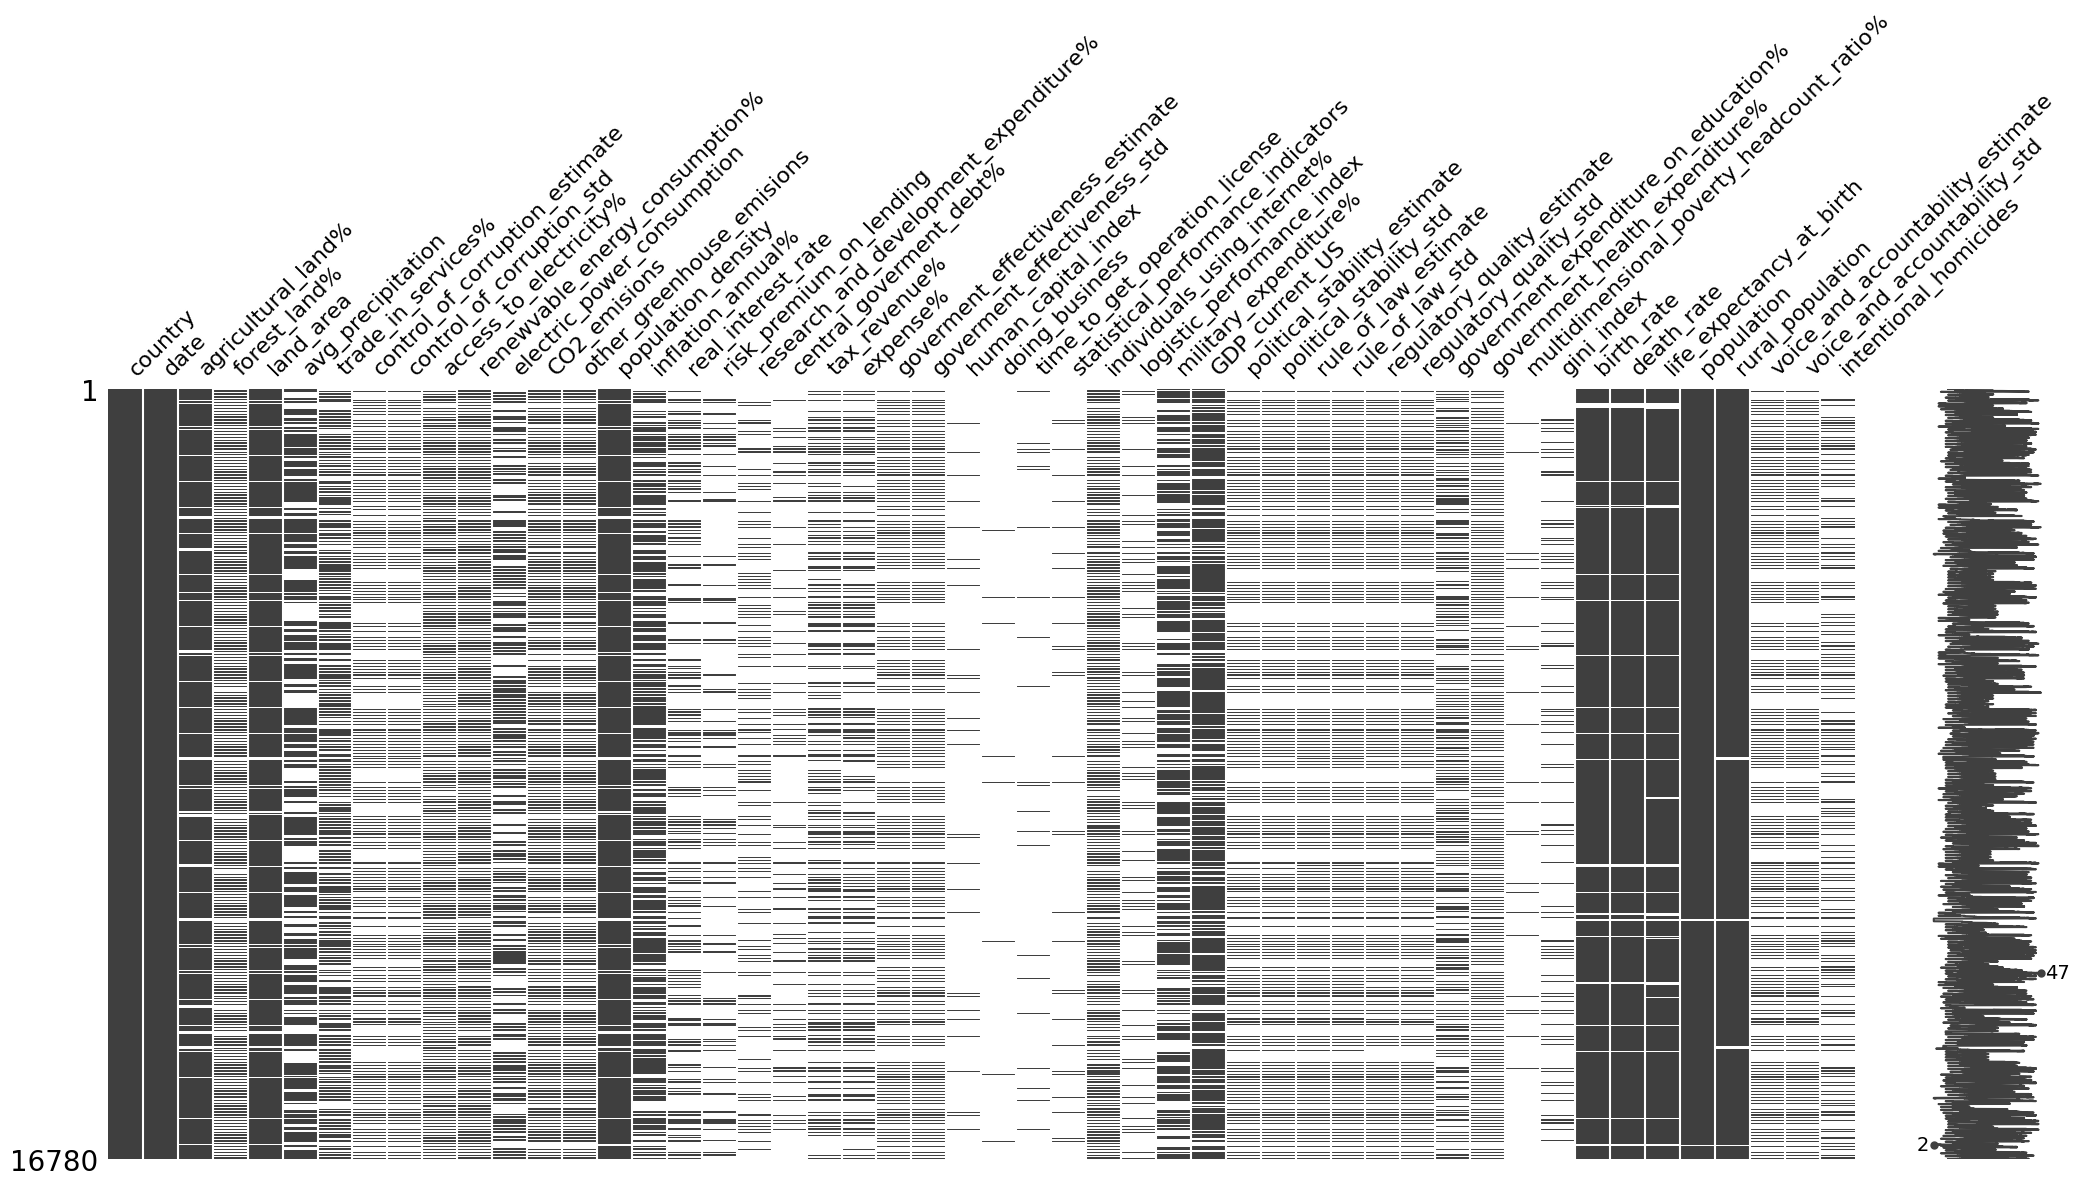

In [6]:
msno.matrix(bank_df)

<p>There are a lot of Nan values, but <mark>I won't drop them</mark>. Mainly, because the missed data can't be fulled because of lack information about locations and countries we are analyzing. Moreover, my key countries, which I would like to analyze have full information I need. So, I will skip the step of filling the data or dropping Nan values for now:</p>
<p>Now, I want to look at the whole dataset in a brief and short format. I will do it with <mark>describe</mark> function. I will tell you the truth, I am not really big fan of describe function. I believe, that I will give even more information about my dataframe using bars and other plots, but it is some kind of classic, <mark>basic</mark> step, so I don't have a desire to ruin traditions</p>

In [7]:
bank_df.describe()

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,15298.000000,7914.000000,1.560800e+04,10086.000000,9165.000000,4564.000000,4564.000000,7348.000000,8076.000000,7790.000000,...,494.000000,1936.000000,16037.000000,16019.000000,15866.000000,1.666500e+04,1.653900e+04,4648.000000,4648.000000,4209.000000
mean,37.527578,32.434329,5.250933e+06,1214.021416,20.817655,-0.025252,0.205194,80.758271,31.029558,2885.316356,...,26.944060,37.972831,28.203396,10.490277,64.254415,2.159657e+08,1.230971e+08,-0.020521,0.168356,8.035708
std,20.541039,23.375578,1.509887e+07,810.573031,23.102523,0.999537,0.096058,28.745117,29.858553,4103.209615,...,11.230843,8.958106,12.862504,5.358993,11.112404,7.102956e+08,4.087557e+08,0.999256,0.065283,12.026623
min,0.262821,0.000000,2.027000e+00,18.100000,0.620993,-1.916457,0.114779,0.533899,0.000000,5.548906,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.103448,0.000000
25%,21.440846,12.430556,2.164000e+04,591.000000,8.670266,-0.789468,0.147604,68.435427,5.065460,375.934172,...,18.300000,31.200000,16.438000,6.976522,56.810602,9.940000e+05,4.295845e+05,-0.848374,0.126870,1.348194
50%,37.694142,30.767208,1.998100e+05,1110.000000,13.318612,-0.259419,0.172769,98.290939,20.989980,1331.112025,...,24.600000,35.800000,27.065000,9.200000,66.776719,6.787419e+06,3.148533e+06,0.020264,0.143427,3.428468
75%,51.439863,47.182057,1.260000e+06,1782.000000,24.283488,0.666368,0.227055,100.000000,53.904220,3893.175308,...,33.050000,43.400000,39.752000,12.441818,72.568000,4.641603e+07,2.036615e+07,0.889256,0.197283,9.402278
max,93.440750,98.574551,1.299870e+08,3240.000000,316.320342,2.459118,0.991055,100.000000,98.340000,54799.174708,...,74.200000,65.800000,58.121000,103.534000,85.497561,7.951150e+09,3.435441e+09,1.800992,0.727239,138.773986


<p>The next step for me and my EDA will be <mark>data types</mark> information. I believe that this is the most useful function in EDA, because not knowing the exact datatypes <mark>will ruin all the plots</mark> and charts process. Only after setting new, appropriate datatypes, start your visualization. This is also classic step - don't miss it!</p>
<p>In this dataset I will change only one column data type - Date. I will convert it to <mark>datetime</mark>. Further you will see that I added some new columns due to this action:</p>

In [8]:
bank_df['date'] = pd.to_datetime(bank_df['date'])
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   country                                    16780 non-null  object        
 1   date                                       16780 non-null  datetime64[ns]
 2   agricultural_land%                         15298 non-null  float64       
 3   forest_land%                               7914 non-null   float64       
 4   land_area                                  15608 non-null  float64       
 5   avg_precipitation                          10086 non-null  float64       
 6   trade_in_services%                         9165 non-null   float64       
 7   control_of_corruption_estimate             4564 non-null   float64       
 8   control_of_corruption_std                  4564 non-null   float64       
 9   access_to_electri

<p>Another classic step for every EDA is to look at the <mark>columns list</mark>. , I always look at the columns list to make sure that they are written correctly and won't ruin my further calculations:</p>

In [9]:
bank_df.columns

Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet%', 'logistic_performance_index',
       'military_expenditure%', 'GDP_current_US',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'reg

In [10]:
bank_df['month'] = bank_df['date'].dt.month
bank_df['year'] = bank_df['date'].dt.year
bank_df['month'] = bank_df['date'].dt.strftime('%B')

<p>Cool, now I am ready to visualize some <mark>brief</mark> facts to satisfy my curiosity. I won't give detailed plot here, just some facts in a string format. Nevertheless, I think they are rather interesting to read. First of all, I want to look at the total amount of countries in the dataset. I figured out that that there are 268 countries here, which lloks like the total amount of each country. Then, I was interesetd in the first data of statistics and last one. It will be useful for building up future plots. Finaly, I outputed median birth rate for 1960 and 2021 (for 2022 and 2023 there are nan values), I realized immediately that <spam>young people nowadays just do not wanna have kids</spam></p>

In [11]:
print(f"Total amount of countries: {bank_df['country'].nunique()}")
print(f"Start date: {bank_df['date'].min()}")
print(f"End date: {bank_df['date'].max()}")
#count median temp for 1966 and 2023. to satisfly curiosity:
print(f"Median birth rate in 1966: {bank_df[bank_df['date'].dt.year == 1960]['birth_rate'].median()}")
print(f"Median birth rate in 2023: {bank_df[bank_df['date'].dt.year == 2021]['birth_rate'].median()}")

Total amount of countries: 268
Start date: 1960-01-01 00:00:00
End date: 2022-01-01 00:00:00
Median birth rate in 1966: 42.876
Median birth rate in 2023: 16.093


In [19]:
bank_df.head()

,country,date,land_area,birth_rate,agricultural_land%,forest_land%,access_to_electricity%,GDP_current_US,individuals_using_internet%
0,Afghanistan,1960-01-01,NaN,50.340,NaN,NaN,NaN,5.377778e+08,NaN
1,Afghanistan,1961-01-01,652230.0,50.443,57.801696,NaN,NaN,5.488889e+08,NaN
2,Afghanistan,1962-01-01,652230.0,50.570,57.893688,NaN,NaN,5.466667e+08,NaN
3,Afghanistan,1963-01-01,652230.0,50.703,57.970348,NaN,NaN,7.511112e+08,NaN
4,Afghanistan,1964-01-01,652230.0,50.831,58.066940,NaN,NaN,8.000000e+08,NaN


<p>Let's look at out dataset for the last time in this section before moving to visualization. We have done a great job, but most importantely, we figured out a lot about data we will deal with in visualization section. So, <mark>lets move on further</mark>:</p>

<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1 id='vis'>📈 Visualization</h1>
</div>
<p></p>
<p>Before start I wanna tell you to be ready for a <mark>giant amount of regplot</mark> - I will build up correlation plots, because there are so many info for which I'd like to see the depences. First of all, I will <mark>split the dataset</mark> and choose only columns I am really interested in. There are not so many of them related to the total emount of columns, but I need them to build up ,y correlations plots. So, let's filter the whole dataset:</p>

In [20]:
selected_columns = ['country','date','land_area','birth_rate','agricultural_land%','forest_land%','access_to_electricity%','GDP_current_US','individuals_using_internet%']
bank_df = bank_df[selected_columns]
bank_df.head()

,country,date,land_area,birth_rate,agricultural_land%,forest_land%,access_to_electricity%,GDP_current_US,individuals_using_internet%
0,Afghanistan,1960-01-01,NaN,50.340,NaN,NaN,NaN,5.377778e+08,NaN
1,Afghanistan,1961-01-01,652230.0,50.443,57.801696,NaN,NaN,5.488889e+08,NaN
2,Afghanistan,1962-01-01,652230.0,50.570,57.893688,NaN,NaN,5.466667e+08,NaN
3,Afghanistan,1963-01-01,652230.0,50.703,57.970348,NaN,NaN,7.511112e+08,NaN
4,Afghanistan,1964-01-01,652230.0,50.831,58.066940,NaN,NaN,8.000000e+08,NaN



<p>Lets start with basics. I want to look at the dependencies between <mark>access to electricity and individuals using Internet</mark>. I clearly understand that there is positive correlation, because one is impossible with the other one. However, I wanted to look how strong this correlation is. I was suprised, realizing that this correlation is not so strong. Just look at the plot below, I expected much stronger correlation:</p>

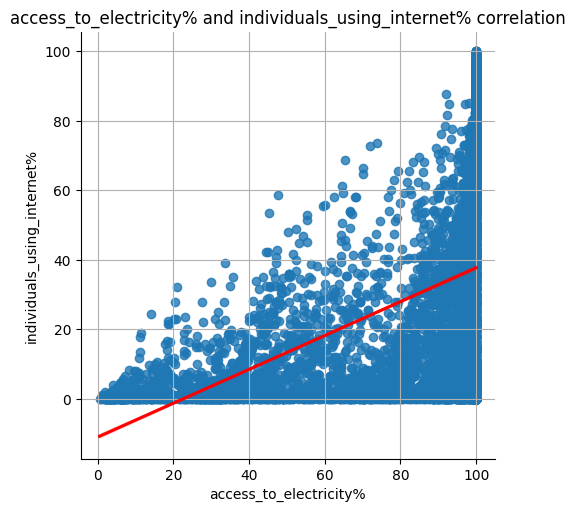

In [14]:
sns.lmplot(data = bank_df, x='access_to_electricity%', y='individuals_using_internet%', line_kws={'color': 'red'})
plt.grid(True)
plt.title('access_to_electricity% and individuals_using_internet% correlation')
plt.show()

<p>Lets continue with some basics and figure out - what the correlation between <mark>GDP and birth rate</mark>. To tell the truth, I expected such a strong negative correlation. At the plot below, we can see thet the <mark>lower GDP of country, the higher birth rate is</mark>. Rich and wealthy economics have some demographical problems. This is a fact, because people prefer to spend fund on their own, but not on kids. Statics say, not me:</p>

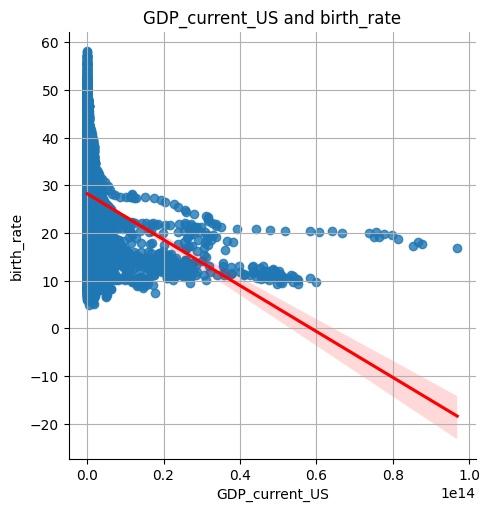

In [15]:
sns.lmplot(data = bank_df, x='GDP_current_US', y='birth_rate', line_kws={'color': 'red'})
plt.grid(True)
plt.title('GDP_current_US and birth_rate')
plt.show()


<p>Finally, its time for not trivial scatter plot. I visualized the correlation between <mark>agricultural_land and land area</mark>. In my head there was a strong sense that the bigger country is, more agricultural land it has, but no. There is weak negative correlation. I think I can explain it. I suppose that in most biggest countries land can't be agricultural due to weather conditions. For example, Russia, Canada, some parts of USA - people can't even leave in some area, there is no even thoughts about agricultural land. I think that neggative correlation is due to this fact:</p>

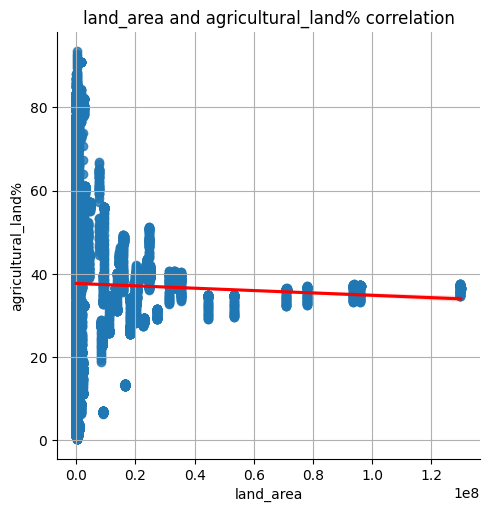

In [16]:
sns.lmplot(data = bank_df, x='land_area', y='agricultural_land%', line_kws={'color': 'red'})
plt.grid(True)
plt.title('land_area and agricultural_land% correlation')
plt.show()

<p>Another thing I want to visualize is <mark>correlation between access to Internet and forest land</mark>. The thing is that in some regions of our planet, the forests are usually the places where there is no access to the mobile network and Internet. That is why, I was curios to look at such a correlation. As you can see, there is weak negative correlation. So, we can say that massive forest lands dont affect on Internet usage so much, wich is cool:</p>

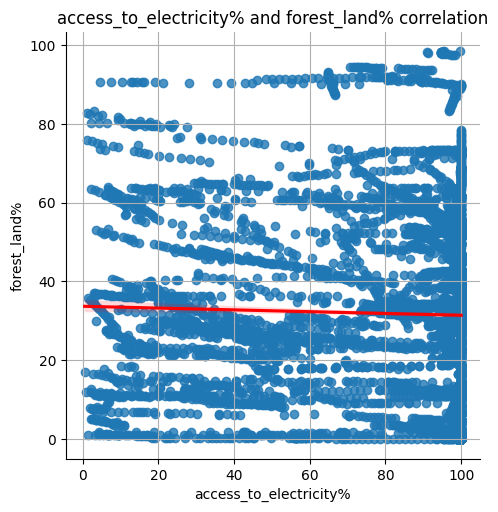

In [17]:
sns.lmplot(data = bank_df, x='access_to_electricity%', y='forest_land%', line_kws={'color': 'red'})
plt.grid(True)
plt.title('access_to_electricity% and forest_land% correlation')
plt.show()

<p>Last scatter plot for today, I promise. I wanted to visualize the <mark>correlation between GDP and Land Area</mark> to see are there any dependencies between the size of the country and its wealth. I was really suprised to see such a strong positive correlation. I think this is because of some big countries (like USA, China, India, Canada, Brazil and Russia) high GDP which in total overweight the Europeans small countries economies</p>

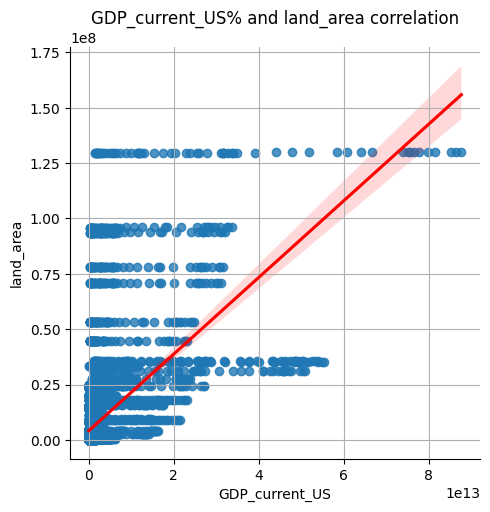

In [18]:
sns.lmplot(data = bank_df, x='GDP_current_US', y='land_area', line_kws={'color': 'red'})
plt.grid(True)
plt.title('GDP_current_US% and land_area correlation')
plt.show()

<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1 id='end'>🧠 Conclusions</h1>
</div>
<p></p>
<p>Here covered only 5% of dataset potencial and I am sure that there are many conclusions you can make there, but I decided to finish my EDA and Scatters here. I learned everything that I wanted in this data - <mark>everything I was curious about</mark>. </p>
<p style='text-align:center'><a href="#top">Back to Table of Contents</a></p>